In [102]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

# Visualización de las señales de audio

Se puede ver a simple vista que las señales son muy distintas. Los audios de música clásica se ven más densos en general, esto se debe a que no presentan cambios de amplitud tan abruptos como los de hip hop. En estos últimos se puede notar que hay una amplitud mayor de las señales y se dan picos más grandes y pronunciados, que además tienen una frecuencia constante a lo largo del audio.

In [70]:
classical_path = '../data/genres_original/classical/classical.00001.wav'
hip_hop_path = '../data/genres_original/hiphop/hiphop.00000.wav'

classical, _ = librosa.load(classical_path)
hip_hop, _ = librosa.load(hip_hop_path)

### Clásica

In [ ]:
fig = px.line(y=classical)
fig.write_html('../data/plots/classical_30s.html')
fig.show()

### Hip Hop

In [ ]:
fig = px.line(y=hip_hop)
fig.write_html('../data/plots/hip_hop_30s.html')
fig.show()

# Ventana de 3 segundos de las señales de audio

Cada audio de 30 segundos se dividió en 10 partes iguales, generando en total 9990 datos

In [73]:
classical_path = '../data/genres_original/classical/classical.00030.wav'
hip_hop_path = '../data/genres_original/hiphop/hiphop.00040.wav'

classical, _ = librosa.load(classical_path)
hip_hop, _ = librosa.load(hip_hop_path)

classical_3s = classical[:int(len(classical)/10)]
hip_hop_3s = hip_hop[:int(len(hip_hop)/10)]

### Clásica

In [ ]:
fig = px.line(y=classical_3s)
fig.write_html('../data/plots/classical_3s.html')
fig.show()

### Hip Hop

In [ ]:
fig = px.line(y=hip_hop_3s)
fig.write_html('../data/plots/hip_hop_3s.html')
fig.show()

# Espectro de fourier

Una herramienta muy útil a la hora de obtener características de las señales es la Transformada de Fourier, la cual nos lleva a un espacio de frecuencias de las que está compuesta una señal de audio determinada

### Clásica

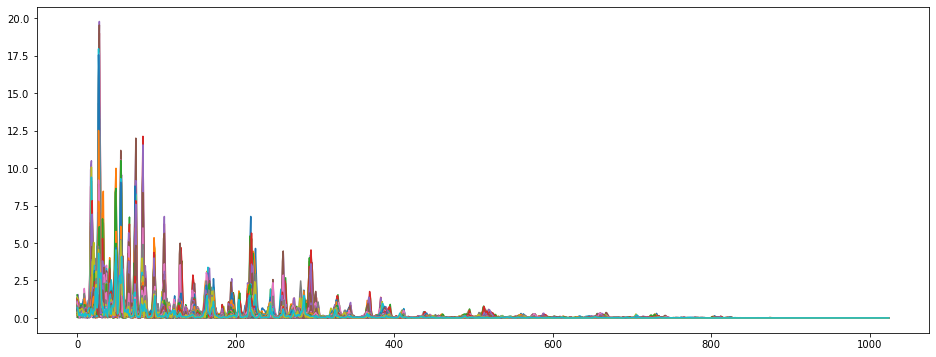

In [76]:
fourier = np.abs(librosa.stft(classical_3s))
plt.figure(figsize = (16, 6))
plt.plot(fourier)
plt.savefig('../data/plots/fourier_classical_1.png')
plt.show()

### Hip Hop

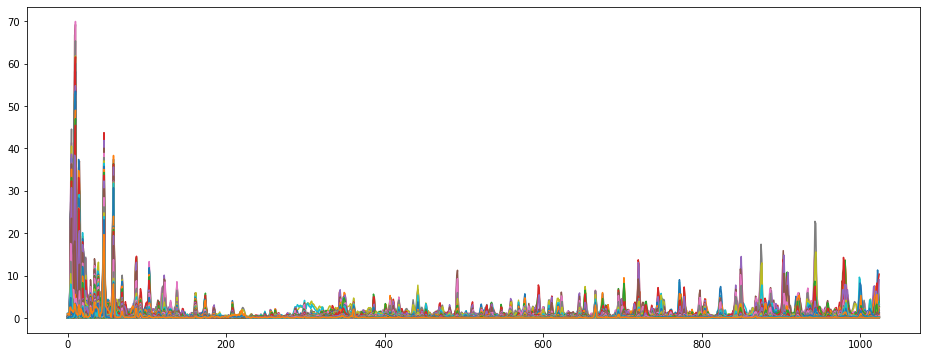

In [77]:
fourier = np.abs(librosa.stft(hip_hop_3s))
plt.figure(figsize = (16, 6))
plt.plot(fourier)
plt.savefig('../data/plots/fourier_hip_hop_1.png')
plt.show()

# Espectrograma

Si dividimos el audio de 3 segundos en diferentes ventanas de tiempo, podemos obtener diferentes espectros de fourier que varían con el tiempo. De esta manera, se puede obtener un diagrama conocido como *espectrograma*.

### Clásica

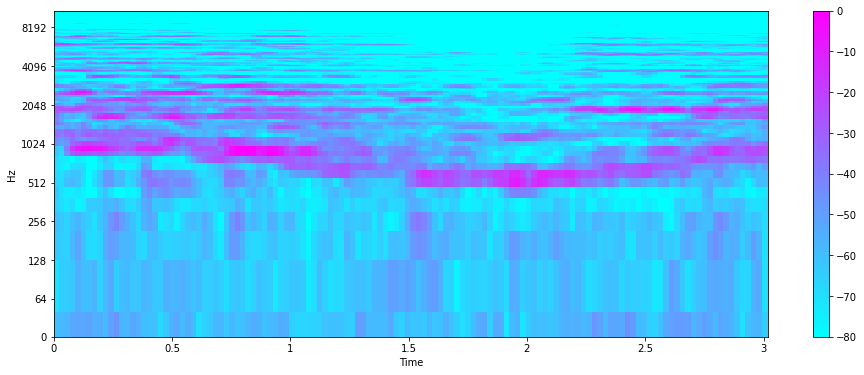

In [78]:
spectro = librosa.feature.melspectrogram(classical_3s)
spectro = librosa.amplitude_to_db(spectro, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(spectro, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.savefig('../data/plots/spectro_classical.png')
plt.show()

### Hip Hop

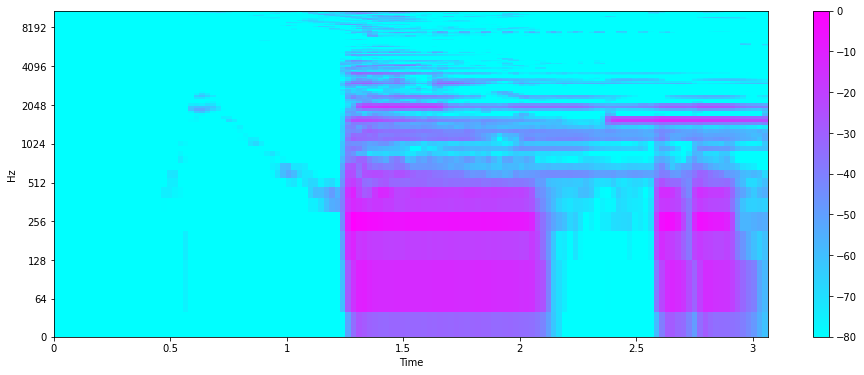

In [79]:
spectro = librosa.feature.melspectrogram(hip_hop_3s)
spectro = librosa.amplitude_to_db(spectro, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(spectro, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.savefig('../data/plots/spectro_hip_hop.png')
plt.show()

# Frecuencias Cromáticas

Las frecuencias cromáticas son las proyecciones del espectro de Fourier en 12 grupos que representan los 12 semitonos que componen una octava musical.

### Clásica

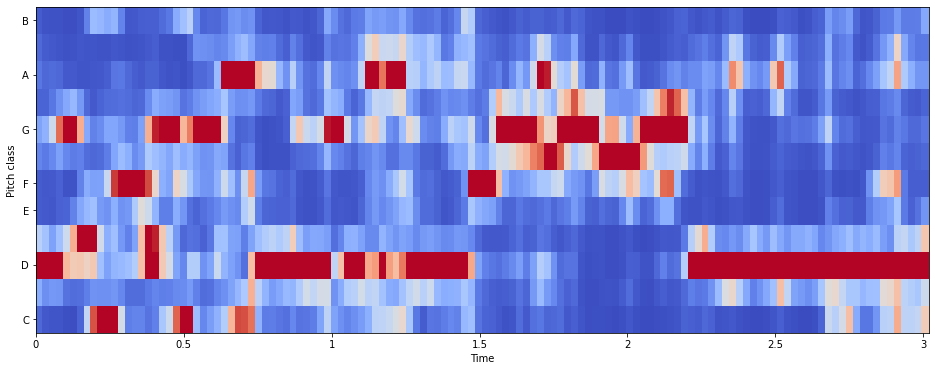

In [80]:
plt.figure(figsize=(16, 6))
chromogram = librosa.feature.chroma_stft(classical_3s)
librosa.display.specshow(chromogram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.savefig('../data/plots/chroma_classical.png')
plt.show()

In [81]:
chromogram.mean(), np.var(chromogram)

(0.25967166, 0.08336102)

### Hip Hop

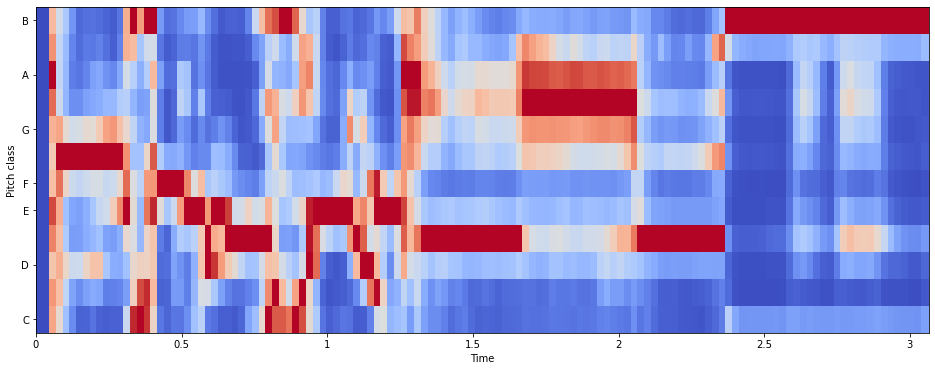

In [82]:
plt.figure(figsize=(16, 6))
chromogram = librosa.feature.chroma_stft(hip_hop_3s)
librosa.display.specshow(chromogram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.savefig('../data/plots/chroma_hip_hop.png')
plt.show()

In [83]:
chromogram.mean(), np.var(chromogram)

(0.34847113, 0.09055032)

# Valores RMS

El valor RMS para una señal en el espacio discreto está definido de la siguiente manera
$$
x_{rms} = \sqrt{\frac{1}{n}(x_1^2 + x_2^2 + \cdot \cdot \cdot + x_n^2)}
$$

### Clásica

In [84]:
rms = librosa.feature.rms(classical_3s)
rms.mean(), np.var(rms)

(0.016663998, 4.2684627e-05)

### Hip Hop

In [85]:
rms = librosa.feature.rms(hip_hop_3s)
rms.mean(), np.var(rms)

(0.05909412, 0.002530185)

# Centroide espectral

Corresponde al promedio de cada ventana de tiempo del espectrograma

### Clásica

In [86]:
centroid = librosa.feature.spectral_centroid(classical_3s)
centroid.mean(), np.var(centroid)

(1337.7405343970695, 86285.75559719885)

### Hip Hop

In [87]:
centroid = librosa.feature.spectral_centroid(hip_hop_3s)
centroid.mean(), np.var(centroid)

(3739.170081383974, 4725049.944269179)

# Ancho de banda espectral

Corresponde al ancho de banda de cada ventana de tiempo del espectrograma

### Clásica

In [88]:
bw = librosa.feature.spectral_bandwidth(classical_3s)
bw.mean(), np.var(bw)

(1417.2380089987041, 22646.268534704283)

### Hip Hop

In [89]:
bw = librosa.feature.spectral_bandwidth(hip_hop_3s)
bw.mean(), np.var(bw)

(3043.4759347616505, 451330.0992478008)

# Roll Off espectral

Corresponde a una aproximación de la frecuencia pico de cada ventana de tiempo del espectrograma

### Clásica

In [90]:
roll_off = librosa.feature.spectral_rolloff(classical_3s)
roll_off.mean(), np.var(roll_off)

(2547.792029747596, 294960.38200308586)

### Hip Hop

In [91]:
roll_off = librosa.feature.spectral_rolloff(hip_hop_3s)
roll_off.mean(), np.var(roll_off)

(7221.53486772017, 8337509.031225273)

# Tasa de paso por cero (Zero Crossing Rate)

Es la cantidad de veces que la señal cruza el cero (cambia de signo) en un segundo

### Clásica

In [92]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(classical_3s)
zero_crossing_rate.mean(), np.var(zero_crossing_rate)

(0.07843674879807692, 0.0010078797114671334)

### Hip Hop

In [93]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(hip_hop_3s)
zero_crossing_rate.mean(), np.var(zero_crossing_rate)

(0.2422466856060606, 0.06452680006281185)

# Componentes de armonía y percusión

Se separa la señal de audio original en dos componentes: armonía y percusión.

### Clásica

In [94]:
harmony, percussive = librosa.effects.hpss(classical_3s)
harmony.mean(), np.var(harmony), percussive.mean(), np.var(percussive)

(0.0006645511, 0.00026336664, 0.00013596367, 1.086143e-05)

In [ ]:
df = pd.DataFrame({'harmony': harmony, 'percussive': percussive})
fig = px.line(df, y=['harmony', 'percussive'])
fig.write_html('../data/plots/h_p_classical.html')
fig.show()

### Hip Hop

In [96]:
harmony, percussive = librosa.effects.hpss(hip_hop_3s)
harmony.mean(), np.var(harmony), percussive.mean(), np.var(percussive)

(2.5878787e-06, 0.004398517, 7.06078e-05, 0.000619563)

In [ ]:
df = pd.DataFrame({'harmony': harmony, 'percussive': percussive})
fig = px.line(df, y=['harmony', 'percussive'])
fig.write_html('../data/plots/h_p_hip_hop.html')
fig.show()

# Tempo

Velocidad con la que se ejecuta una pieza musical. Se mide en BPM (Beats per Minute).

### Clásica

In [98]:
tempo, _ = librosa.beat.beat_track(classical_3s)
tempo

112.34714673913044

### Hip Hop

In [99]:
tempo, _ = librosa.beat.beat_track(hip_hop_3s)
tempo

89.10290948275862

# MFCCs (Mel-Frequency Cepstral Coefficients)

Estos coeficientes son características de la señal que representan el timbre en una señal de audio

### Clásica

In [100]:
mfcc = librosa.feature.mfcc(classical_3s)[0]
mfcc.mean(), np.var(mfcc)

(-356.041, 2348.0715)

### Hip Hop

In [101]:
mfcc = librosa.feature.mfcc(hip_hop_3s)[0]
mfcc.mean(), np.var(mfcc)

(-289.6301, 24189.844)